# Network

books:
- UNIX网络编程卷1：套接字API 
- UNIX网络编程卷2：进程间通信 
- TCP/IP Illustrated, Volume 1: The Protocols
- TCP IP Illustrated, Volume 2: The Implementation
- Understanding Linux Network Internals 

more books:
- The Linux Programming Interface 
- Advanced Programming in the UNIX Environment 

More:
- [Network.md](./Network.md)

# 术语

## I/O模型

> UNIX网络编程卷1：套接字API - 6.2 I/O模型

- 阻塞I/O
- 非阻塞I/O
- I/O复用: `select`, `poll`
- 信号驱动I/O: `SIGIO`
- 异步/IO: POSIX.1 `aio_`

对一个套接口上的输入操作, 有两个阶段:
- 1. 等待数据到达网络, 当分组到达时, 它被拷贝到内核的某个缓冲区.
- 2. 将数据从内核缓冲区拷贝到应用缓冲区.


<!-- ![](./images/IO模型比较.png) -->
<img src="./images/IO模型比较.png" alt="drawing" width="800"/>


## 阻塞/非阻塞

<!-- ![](./images/阻塞IO模型.png) -->
<img src="./images/阻塞IO模型.png" alt="drawing" width="800"/>


- `recvfrom`: 有一个从应用进程中运行到内核中运行的切换, 再跟一个返回到应用进程的切换.
- `recvfrom`直到数据报到达且拷贝到应用缓冲区或是出错才返回.
- 进程阻塞的时间: 从调用`recvfrom`开始到它返回的这段时间.
- 轮询(polling): 循环调用`recvfrom`, 不断查询内核, 看某个操作是否准备好.

> UNIX网络编程卷1：套接字API - 15. 非阻塞I/O

缺省情况下, 套接字是阻塞方式的, 这意味着当一个套接口调用不能立即完成时, 进程进入睡眠状态, 等待操作完成.

<!-- ![](./images/非阻塞IO模型.png) -->
<img src="./images/非阻塞IO模型.png" alt="drawing" width="800"/>


- 将套接口设置成非阻塞方式, 即通知内核: 当请求的I/O操作非得让进程睡眠不能完成时, 不要让进程睡眠, 而应返回一个错误.
- 前3次调用`recvfrom`时无数据返回, 内核立即返回一个`EWOULDBLOCK`错误.
- 第4次调用`recvfrom`是数据报已准备好, 被拷贝到应用缓冲区, `recvfrom`返回成功.








## I/O复用: select, poll, epoll

<!-- ![](./images/IO复用模型.png) -->
<img src="./images/IO复用模型.png" alt="drawing" width="800"/>


- 调用`select`或`poll`, 在这些系统调用的某一个上阻塞, 而不是阻塞于真正的I/O系统调用.
- 阻塞于`select`调用, 等待数据报套接口可读: 等待可能多个套接口中的任一个变为可读.
- 当`select`返回套接口可读条件时, 调用`recvfrom`将数据报拷贝到应用缓冲区.

## 信号驱动I/O

<!-- ![](./images/信号驱动IO模型.png) -->
<img src="./images/信号驱动IO模型.png" alt="drawing" width="800"/>

- 使用信号, 让内核在描述字准备好时用信号`SIGIO`通知我们.
- 先允许套接口进行信号驱动I/O, 通过系统调用`sigaction`安装一个信号处理程序(该系统调用是非阻塞的, 立即返回, 进程继续工作).
- 当数据报准备好被读时, 内核为进程生成一个`SIGIO`信号.
- 可以在信号处理程序中调用`recvfrom`读数据报, 并通知主循环数据已准备好被处理, 也可以通知主循环让它读数据报.

## 同步/异步

- 同步I/O操作引起请求进程阻塞, 直到I/O完成.
- 异步I/O操作不引起请求进程阻塞.

<!-- ![](./images/异步IO模型.png) -->
<img src="./images/异步IO模型.png" alt="drawing" width="800"/>

- 让内核启动操作, 并在整个操作完成(包括将数据从内核拷贝到应用缓冲区)后, 通知我们.
- 调用`aio_read`给内核传递描述字, 缓冲区指针, 缓冲区大小, 文件偏移, 并告诉内核当整个操作完成时如何通知我们(例如生成一个信号).
- `aio_read`立即返回, 进程不阻塞于等待I/O操作的完成.


# OSI Model

<!-- ![](./images/OSI%20model.png) -->
<img src="./images/OSI%20model.png" alt="drawing" width="800"/>

# TCP/IP Suite

<img src="./images/TCPIP%20Suite.png" alt="drawing" width="800"/>

Address, Protocols:

<img src="./images/TCPIP address and protocols.png" alt="drawing" width="800"/>

# RFC
- [Official Internet Protocol Standards](https://www.rfc-editor.org/standards.php)

# Packet

- [pocketguide1.pdf](./pocketguide1.pdf)

# IP

# DNS
- [DNS.ipynb](./DNS.ipynb)

# TCP
- [TCP.ipynb](./TCP.ipynb)

# UDP

# Apache Commons Net
* https://commons.apache.org/proper/commons-net/

Supported protocols include:

- FTP/FTPS
- FTP over HTTP (experimental)
- NNTP
- SMTP(S)
- POP3(S)
- IMAP(S)
- Telnet
- TFTP
- Finger
- Whois
- rexec/rcmd/rlogin
- Time (rdate) and Daytime
- Echo
- Discard
- NTP/SNTP

# Netty
- [Netty.ipynb](./Netty.ipynb)

# gRPC

- [透明重试](https://github.com/grpc/proposal/blob/master/A6-client-retries.md#transparent-retries)

actions:
- Golang\applications\grpc
- Python\applications\network

# HTTP
* [HTTP.ipynb](./HTTP.ipynb)

# Tools
- [RFC20 - ASCII format for Network Interchange](https://datatracker.ietf.org/doc/html/rfc20)

Misc:
- [An ASCII Header Generator for Network Protocols](https://github.com/luismartingarcia/protocol)

In [4]:
import requests

res = requests.get('https://www.rfc-editor.org/rfc/rfc20.txt').text

In [63]:
# print(res)

## nwdiag
* https://github.com/blockdiag/nwdiag
* fonts: http://blockdiag.com/en/nwdiag/introduction.html

> nwdiag generate network-diagram image file from spec-text file.

> nwdiag package contains three commands: nwdiag, packetdiag and rackdiag. [ref](https://groups.google.com/g/blockdiag-discuss/c/gp0_1fBbFcE)


WARN: not well-documented grammar see [parser.py](https://github.com/blockdiag/nwdiag/blob/master/src/packetdiag/parser.py)

In [56]:
!pip install blockdiag
!pip install funcparserlib
!pip install nwdiag
# https://github.com/tensorflow/models/issues/11040
!pip install Pillow==9.5.0

In [57]:
!nwdiag --version

nwdiag 3.0.0


In [ ]:
!nwdiag --help

Usage: nwdiag [options] infile

Options:
  --version             show program's version number and exit
  -h, --help            show this help message and exit
  -a, --antialias       Pass diagram image to anti-alias filter
  -c FILE, --config=FILE
                        read configurations from FILE
  --debug               Enable debug mode
  -o FILE               write diagram to FILE
  -f FONT, --font=FONT  use FONT to draw diagram
  --fontmap=FONT        use FONTMAP file to draw diagram
  --no-transparency     do not make transparent background of diagram (PNG
                        only)
  --size=SIZE           Size of diagram (ex. 320x240)
  -T TYPE               Output diagram as TYPE format
  --nodoctype           Do not output doctype definition tags (SVG only)


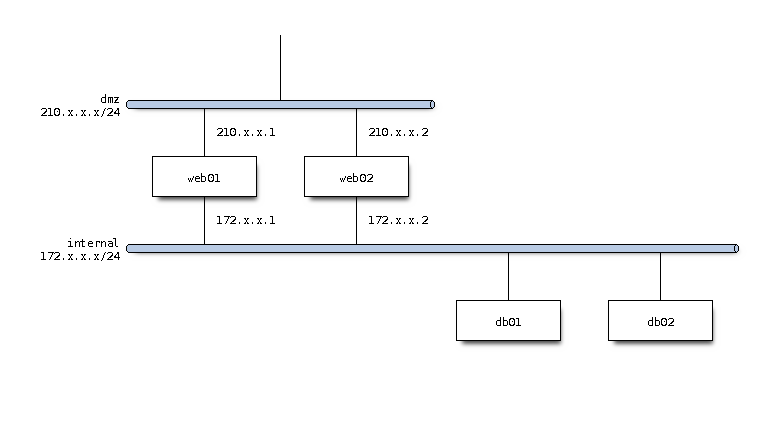

In [88]:
!nwdiag -f C:/Windows/Fonts/DejaVuSansMono.ttf -o diag/sample.png diag/sample.diag
from IPython.display import Image
Image(filename="diag\\sample.png") 

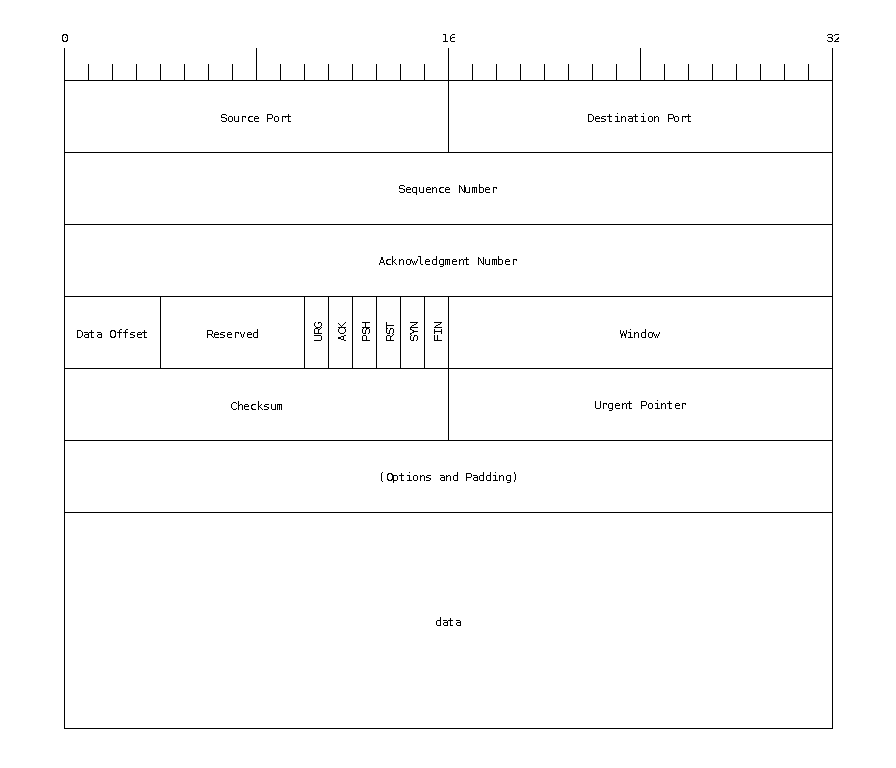

In [89]:
!packetdiag -f C:/Windows/Fonts/DejaVuSansMono.ttf -o diag/tcp.png diag/tcp.diag
from IPython.display import Image
Image(filename="diag\\tcp.png") 

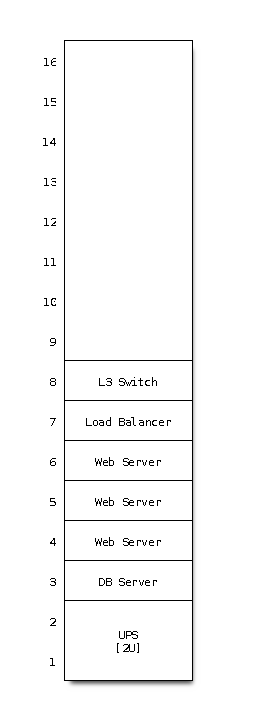

In [90]:
!rackdiag -f C:/Windows/Fonts/DejaVuSansMono.ttf -o diag/rack.png diag/rack.diag
from IPython.display import Image
Image(filename="diag\\rack.png") 

## vscode-pdf
* https://marketplace.visualstudio.com/items?itemName=tomoki1207.pdf

## tcpdump
- [tcpdump.ipynb](./tools/tcpdump.ipynb)

## Wireshark
* [Wireshark.ipynb](./tools/Wireshark.ipynb)

## HAProxy
* [HAProxy.ipynb](./tools/HAProxy.ipynb)

# Linux Network Kernel Parameters

* [linux-network-performance-parameters](https://github.com/leandromoreira/linux-network-performance-parameters)

In [2]:
%env ROOT_PWD=zhoujiagen

env: ROOT_PWD=zhoujiagen


In [ ]:
# sysctl 
# -a: Display all values currently available.
# -w: Use this option when all arguments prescribe a key to be set.
# -p: Use this option when all arguments prescribe a key to be set.
!echo $ROOT_PWD | sudo -S sysctl -a | grep net | sort | head -n 20

[sudo] password for zhoujiagen: net.bridge.bridge-nf-call-arptables = 1
net.bridge.bridge-nf-call-ip6tables = 1
net.bridge.bridge-nf-call-iptables = 1
net.bridge.bridge-nf-filter-pppoe-tagged = 0
net.bridge.bridge-nf-filter-vlan-tagged = 0
net.bridge.bridge-nf-pass-vlan-input-dev = 0
net.core.bpf_jit_enable = 1
net.core.bpf_jit_harden = 0
net.core.bpf_jit_kallsyms = 1
net.core.bpf_jit_limit = 528482304
net.core.busy_poll = 0
net.core.busy_read = 0
net.core.default_qdisc = fq_codel
net.core.dev_weight = 64
net.core.dev_weight_rx_bias = 1
net.core.dev_weight_tx_bias = 1
net.core.devconf_inherit_init_net = 0
net.core.fb_tunnels_only_for_init_net = 0
net.core.flow_limit_cpu_bitmap = 00000
net.core.flow_limit_table_len = 4096


In [15]:
!echo $ROOT_PWD | sudo -S sysctl -a | grep net | grep retrie

[sudo] password for zhoujiagen: net.ipv4.tcp_orphan_retries = 0
net.ipv4.tcp_retries1 = 3
net.ipv4.tcp_retries2 = 15
net.ipv4.tcp_syn_retries = 6
net.ipv4.tcp_synack_retries = 5
net.ipv4.vs.sync_retries = 0
net.ipv6.idgen_retries = 3


In [5]:
!cat /etc/sysctl.conf | grep "net" # | grep -v "#"

# Functions previously found in netbase
#net.ipv4.conf.default.rp_filter=1
#net.ipv4.conf.all.rp_filter=1
# See http://lwn.net/Articles/277146/
#net.ipv4.tcp_syncookies=1
#net.ipv4.ip_forward=1
#net.ipv6.conf.all.forwarding=1
# Additional settings - these settings can improve the network
# security of the host and prevent against some network attacks
# redirection. Some network environments, however, require that these
#net.ipv4.conf.all.accept_redirects = 0
#net.ipv6.conf.all.accept_redirects = 0
# net.ipv4.conf.all.secure_redirects = 1
#net.ipv4.conf.all.send_redirects = 0
#net.ipv4.conf.all.accept_source_route = 0
#net.ipv6.conf.all.accept_source_route = 0
#net.ipv4.conf.all.log_martians = 1


In [11]:
# ex: echo "0" > /proc/sys/net/ipv4/tcp_tw_recycle # net.ipv4.tcp_tw_recycle has been removed from Linux in 4.12
# !tree /proc/sys/net
!cat /proc/sys/net/ipv4/tcp_keepalive_time

7200


# Ubuntu Network
* https://documentation.ubuntu.com/server/explanation/networking/

## netplan
* https://github.com/canonical/netplan

```shell
sudo apt-get install netplan.io
```

# NetworkManager
* [Ubuntu NetworkManager and netplan](https://ubuntu.com/core/docs/networkmanager/networkmanager-and-netplan)